<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

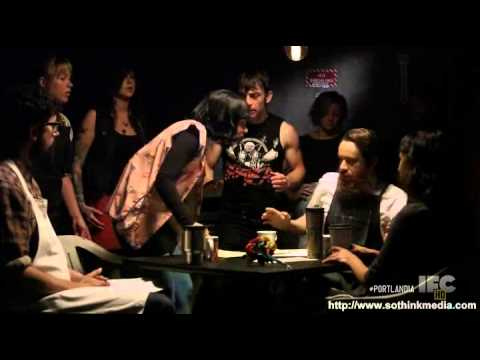

In [1]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [2]:
%pwd

'C:\\Users\\admca\\Projects\\DS-Unit-4-Sprint-1-NLP\\module1-text-data'

In [3]:
import pandas as pd

url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [4]:
# Start here 

## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [5]:
# Feature engineering: 
#   - review date (datetime)
#   - review text (date removed)
#   - star rating (int)
#   - positive rating (bool)

import re

MIN_POS_RATING = 4

date_pat = re.compile(r"\d\d?/\d\d?/\d{4}")
star_rating_pat = re.compile("\d(?=\.)")

# Create a datetime feature for date of review
date_text_se = shops["full_review_text"].apply(lambda x: date_pat.search(x)[0])
shops["review_date"] = pd.to_datetime(date_text_se, infer_datetime_format=True)

# Create a concise review text that does not include the date
shops["review_text"] = shops["full_review_text"].apply(lambda x: date_pat.sub("", x).strip())

# Create an integer star rating feature
star_rating_int_text_se = shops["star_rating"].apply(lambda x: star_rating_pat.search(x)[0])
shops["star_rating_int"] = pd.to_numeric(star_rating_int_text_se)

# Create a boolean feature that indicates whether a review is positive
shops["positive_review"] = shops["star_rating_int"] >= MIN_POS_RATING 

shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,review_text,star_rating_int,positive_review
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,1 check-in Love love loved the atmosphere! Eve...,5,True
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust...",4,True
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,1 check-in Listed in Brunch Spots I loved the ...,4,True
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,Very cool decor! Good drinks Nice seating How...,2,False
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,1 check-in They are located within the Northcr...,4,True


In [6]:
# Tokenize reviews

import spacy
from spacy.tokenizer import Tokenizer

# Initialize spaCy model and tokenizer
nlp = spacy.load("en_core_web_lg")
tokenizer = Tokenizer(nlp.vocab)

STOP_WORDS = nlp.Defaults.stop_words.union(["coffee", "1", "check-in", "it's", "i", "the", "this", "it", "i'm", "i've"])

def valid_token(token):
    return (token.text.lower() not in STOP_WORDS) & (token.is_punct == False) & (token.text != " ")

# Make tokens from reviews using the Tokenizer Pipe
tokens = []
for doc in tokenizer.pipe(shops['review_text'], batch_size=500):
    doc_tokens = [token.text.lower() for token in doc if valid_token(token)]
    tokens.append(doc_tokens)

shops['spaCy_tokens'] = tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,review_date,review_text,star_rating_int,positive_review,spaCy_tokens
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,1 check-in Love love loved the atmosphere! Eve...,5,True,"[love, love, loved, atmosphere!, corner, shop,..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust...",4,True,"[listed, date, night:, austin,, ambiance, aust..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,1 check-in Listed in Brunch Spots I loved the ...,4,True,"[listed, brunch, spots, loved, eclectic, homey..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,Very cool decor! Good drinks Nice seating How...,2,False,"[cool, decor!, good, drinks, nice, seating, ho..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,1 check-in They are located within the Northcr...,4,True,"[located, northcross, mall, shopping, center, ..."


In [7]:
# Stemming

from nltk.stem import PorterStemmer
from tqdm import tqdm
tqdm.pandas()

ps = PorterStemmer()
shops['stems'] = shops["spaCy_tokens"].progress_apply(lambda x: [ps.stem(word) for word in x])
shops.head()

C:\Users\admca\anaconda3\envs\U4-S1-NLP\lib\site-packages\tqdm\std.py:703: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  from pandas import Panel
100%|█████████████████████████████████████████████████████████████████████████████| 7616/7616 [00:10<00:00, 719.25it/s]


,coffee_shop_name,full_review_text,star_rating,review_date,review_text,star_rating_int,positive_review,spaCy_tokens,stems
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,1 check-in Love love loved the atmosphere! Eve...,5,True,"[love, love, loved, atmosphere!, corner, shop,...","[love, love, love, atmosphere!, corner, shop, ..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust...",4,True,"[listed, date, night:, austin,, ambiance, aust...","[list, date, night:, austin,, ambianc, austin,..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,1 check-in Listed in Brunch Spots I loved the ...,4,True,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclect, homey, plus..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,Very cool decor! Good drinks Nice seating How...,2,False,"[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor!, good, drink, nice, seat, howeve..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,1 check-in They are located within the Northcr...,4,True,"[located, northcross, mall, shopping, center, ...","[locat, northcross, mall, shop, center, face, ..."


In [8]:
# Lemmatization

def get_lemmas(text):

    doc = nlp(text)
    
    lemmas = []
    for token in doc: 
        if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
            lemmas.append(token.lemma_)
    
    return lemmas

shops['lemmas'] = shops['review_text'].progress_apply(get_lemmas)
shops.head()

100%|██████████████████████████████████████████████████████████████████████████████| 7616/7616 [03:41<00:00, 34.35it/s]


,coffee_shop_name,full_review_text,star_rating,review_date,review_text,star_rating_int,positive_review,spaCy_tokens,stems,lemmas
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating,2016-11-25,1 check-in Love love loved the atmosphere! Eve...,5,True,"[love, love, loved, atmosphere!, corner, shop,...","[love, love, love, atmosphere!, corner, shop, ...","[1, check, Love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating,2016-12-02,"Listed in Date Night: Austin, Ambiance in Aust...",4,True,"[listed, date, night:, austin,, ambiance, aust...","[list, date, night:, austin,, ambianc, austin,...","[list, Date, Night, Austin, Ambiance, Austin, ..."
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating,2016-11-30,1 check-in Listed in Brunch Spots I loved the ...,4,True,"[listed, brunch, spots, loved, eclectic, homey...","[list, brunch, spot, love, eclect, homey, plus...","[1, check, list, Brunch, Spots, love, eclectic..."
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating,2016-11-25,Very cool decor! Good drinks Nice seating How...,2,False,"[cool, decor!, good, drinks, nice, seating, ho...","[cool, decor!, good, drink, nice, seat, howeve...","[cool, decor, good, drink, nice, seating, , ..."
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating,2016-12-03,1 check-in They are located within the Northcr...,4,True,"[located, northcross, mall, shopping, center, ...","[locat, northcross, mall, shop, center, face, ...","[1, check, locate, Northcross, mall, shopping,..."


In [9]:
from collections import Counter

def count(docs):
    '''This function takes a list of tokenized documents as input and returns
    a dataframe with frequency counts and rank for each token.
    
    # Arguments
        docs: list, tokenized list of documents
        
    # Returns
        wc: dataframe, 
    '''
    
    word_counts = Counter()
    appears_in = Counter()

    total_docs = len(docs)

    for doc in docs:
        word_counts.update(doc)
        appears_in.update(set(doc))

    temp = zip(word_counts.keys(), word_counts.values())

    wc = pd.DataFrame(temp, columns = ['word', 'count'])

    wc['rank'] = wc['count'].rank(method='first', ascending=False)
    total = wc['count'].sum()

    wc['pct_total'] = wc['count'].apply(lambda x: x / total)

    wc = wc.sort_values(by='rank')
    wc['cul_pct_total'] = wc['pct_total'].cumsum()

    t2 = zip(appears_in.keys(), appears_in.values())
    ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
    wc = ac.merge(wc, on='word')

    wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)

    return wc.sort_values(by='rank')

In [10]:
shops_pos = shops[shops["positive_review"]]
shops_neg = shops[~shops["positive_review"]]

In [11]:
# Tokens - Overall Word Count

wc_tokens = count(shops["spaCy_tokens"])
wc_tokens.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
129,place,3029,4264,1.0,0.011428,0.011428,0.397715
107,great,2438,3250,2.0,0.008711,0.020139,0.320116
159,like,2034,2902,3.0,0.007778,0.027917,0.267069
165,good,2084,2779,4.0,0.007448,0.035365,0.273634
20,love,1434,1806,5.0,0.004840,0.040205,0.188288


In [12]:
# Tokens - Word Count for Positive Reviews

wc_tokens_pos = count(shops_pos["spaCy_tokens"])
wc_tokens_pos.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
129,place,2432,3389,1.0,0.011683,0.011683,0.396091
107,great,2174,2902,2.0,0.010004,0.021687,0.354072
330,good,1643,2180,3.0,0.007515,0.029202,0.267590
199,like,1486,2068,4.0,0.007129,0.036331,0.242020
20,love,1263,1604,5.0,0.005529,0.041861,0.205700


In [13]:
# Tokens - Word Count for Negative Reviews

wc_tokens_neg = count(shops_neg["spaCy_tokens"])
wc_tokens_neg.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
133,place,597,875,1.0,0.010538,0.010538,0.404472
4,like,548,834,2.0,0.010045,0.020583,0.371274
10,good,441,599,3.0,0.007214,0.027797,0.298780
208,don't,340,430,4.0,0.005179,0.032976,0.230352
176,food,266,369,5.0,0.004444,0.037420,0.180217


In [14]:
# Stems - Overall Word Count

wc_stems = count(shops["stems"])
wc_stems.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
117,place,3257,4769,1.0,0.012782,0.012782,0.427652
100,great,2441,3256,2.0,0.008727,0.021508,0.320509
154,like,2193,3193,3.0,0.008558,0.030066,0.287946
160,good,2184,2935,4.0,0.007866,0.037932,0.286765
18,love,1856,2397,5.0,0.006424,0.044357,0.243697


In [15]:
# Stems - Stems for Positive Reviews

wc_stems_pos = count(shops_pos["stems"])
wc_stems_pos.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
117,place,2621,3795,1.0,0.013083,0.013083,0.426873
100,great,2176,2907,2.0,0.010021,0.023104,0.354397
314,good,1731,2308,3.0,0.007956,0.031060,0.281922
188,like,1607,2280,4.0,0.007860,0.038920,0.261726
18,love,1643,2135,5.0,0.007360,0.046280,0.267590


In [16]:
# Stems - Stems for Negative Reviews

wc_stems_neg = count(shops_neg["stems"])
wc_stems_neg.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
126,place,636,974,1.0,0.011731,0.011731,0.430894
6,like,586,913,2.0,0.010996,0.022727,0.397019
159,order,401,651,3.0,0.007841,0.030567,0.271680
14,good,453,627,4.0,0.007551,0.038119,0.306911
233,time,322,444,5.0,0.005347,0.043466,0.218157


In [17]:
# Lemmas - Overall Word Count

wc_lemmas = count(shops["lemmas"])
wc_lemmas.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,,4345,15025,1.0,0.039798,0.039798,0.570509
13,coffee,4845,10131,2.0,0.026835,0.066632,0.636161
118,place,3875,6029,3.0,0.015969,0.082601,0.508797
154,good,3575,5344,4.0,0.014155,0.096756,0.469407
102,great,2844,3917,5.0,0.010375,0.107132,0.373424


In [18]:
# Lemmas - Lemmas for Positive Reviews

wc_lemmas_pos = count(shops["lemmas"])
wc_lemmas_pos.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,,4345,15025,1.0,0.039798,0.039798,0.570509
13,coffee,4845,10131,2.0,0.026835,0.066632,0.636161
118,place,3875,6029,3.0,0.015969,0.082601,0.508797
154,good,3575,5344,4.0,0.014155,0.096756,0.469407
102,great,2844,3917,5.0,0.010375,0.107132,0.373424


In [19]:
# Lemmas - Lemmas for Positive Reviews

wc_lemmas_neg = count(shops["lemmas"])
wc_lemmas_neg.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
35,,4345,15025,1.0,0.039798,0.039798,0.570509
13,coffee,4845,10131,2.0,0.026835,0.066632,0.636161
118,place,3875,6029,3.0,0.015969,0.082601,0.508797
154,good,3575,5344,4.0,0.014155,0.096756,0.469407
102,great,2844,3917,5.0,0.010375,0.107132,0.373424


## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


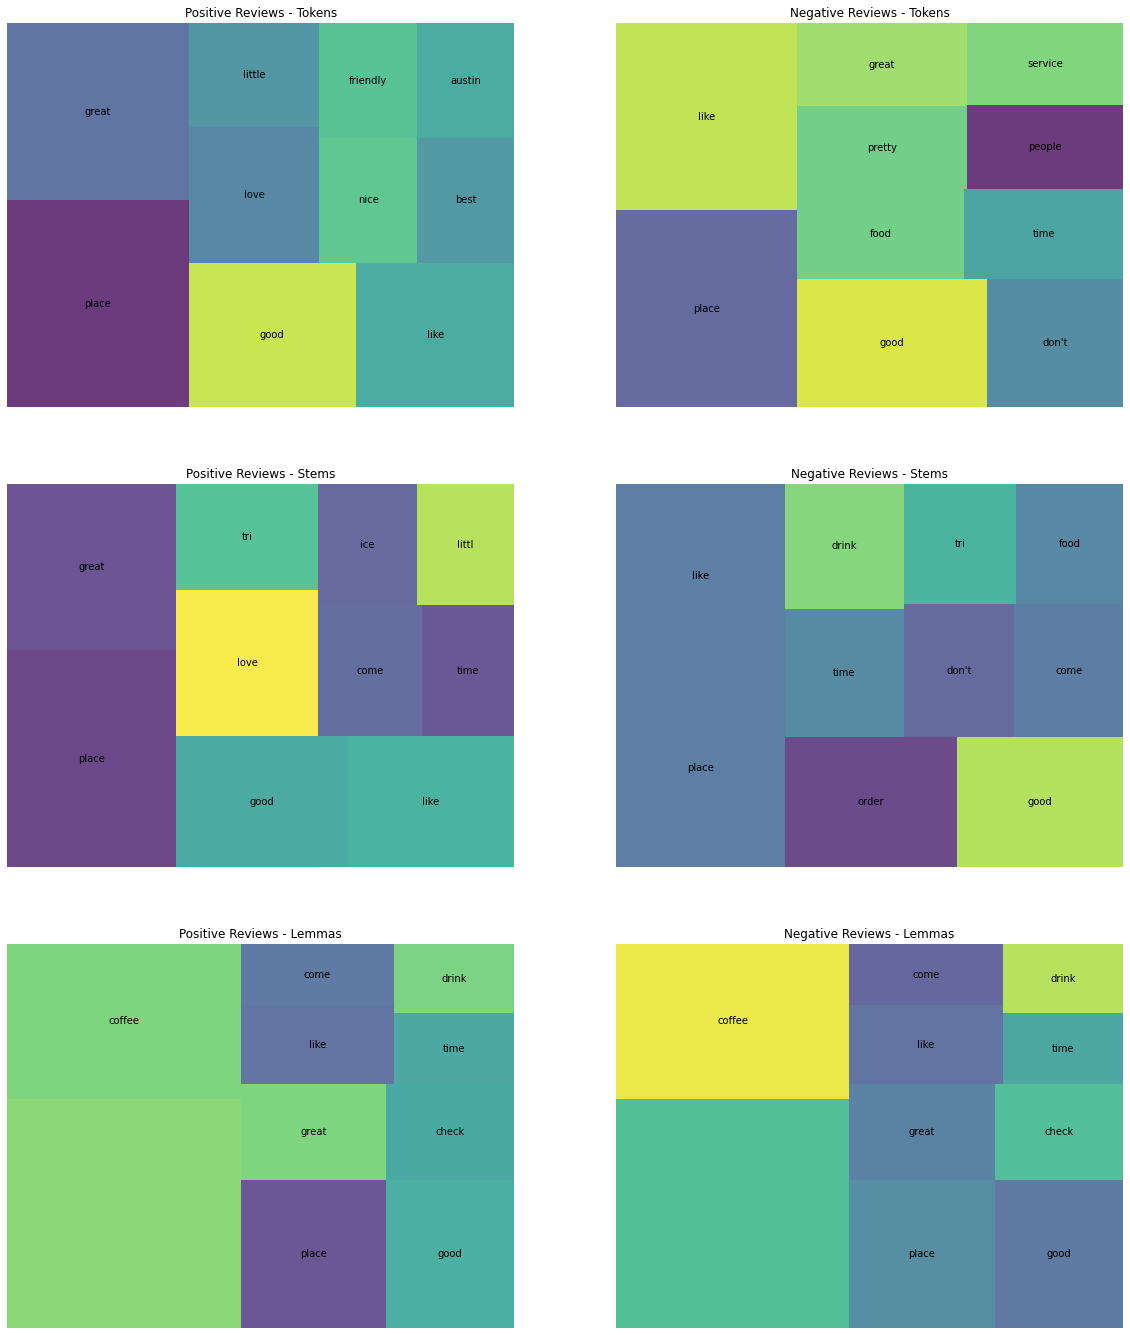

In [20]:
# Squarify

import squarify
import matplotlib.pyplot as plt
import seaborn as sns
from itertools import chain

NUM_COLS = 2
COL_WIDTH = 10
ROW_WIDTH = 8

def visualize_top_n_wcs(wcs, n):
    num_rows = (len(wcs) + 1) // 2
    fig, axes = plt.subplots(num_rows, NUM_COLS, figsize=(NUM_COLS * COL_WIDTH, num_rows * ROW_WIDTH))
    
    for i, (wc, title) in enumerate(wcs):
        ax = axes[i // NUM_COLS][i % 2]
        wc_topN = wc[wc['rank'] <= n]
        
        ax.set_title(title)
        squarify.plot(sizes=wc_topN['pct_total'], label=wc_topN['word'], alpha=.8, ax=ax)
        ax.axis('off')

dfs = [wc_tokens_pos, wc_tokens_neg, 
       wc_stems_pos, wc_stems_neg, 
       wc_lemmas_pos, wc_lemmas_neg]

titles = list(chain.from_iterable((s + " Reviews - " + t 
                                   for s in ("Positive", "Negative")) 
                                  for t in ("Tokens", "Stems", "Lemmas")))

visualize_top_n_wcs(list(zip(dfs, titles)), 10)

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

